In [1]:
import pandas
import os
import cv2
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, 'C:/Users/chuck/OneDrive/Desktop/Honors/solarEL/solarel')
from image_processor import split_module_to_cells, fix_barrel_distortion, load_model, find_pv_module
import numpy as np

image_folder = "C:/Users/chuck/OneDrive/Desktop/IV_curve_prediction/Images"

In [2]:
def search_files_with_string(root_dir, search_string):
    # Ensure the root directory exists
    if not os.path.exists(root_dir):
        print(f"Directory '{root_dir}' does not exist.")
        return

    # Iterate through all directories and files in the root directory
    for root, _, files in os.walk(root_dir):
        for filename in files:
            # Check if the file name wholly contains the search string
            if search_string in filename:
                return os.path.join(root, filename)

# Example usage:
root_directory = "C:/Users/chuck/OneDrive/Desktop/IV_curve_prediction/Images"  # Replace with your target directory path
search_string = '1090519175SB1051034'  # Replace with your desired search string
file_name = search_files_with_string(root_directory, search_string)

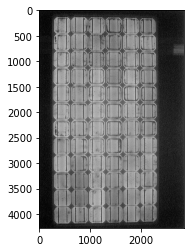

In [3]:
img = cv2.imread(file_name)
plt.imshow(img)

In [4]:
model_path_cells = (
    "C:/Users/chuck/OneDrive/Desktop/Honors/models/resnet_backbone_512.hdf5"
)
model_path_module = (
    "C:/Users/chuck/OneDrive/Desktop/Honors/models/resnet_PV_module_256.hdf5"
)
toml_path = "C:/Users/chuck/OneDrive/Desktop/Honors/solarEL/solarel/configs/camera_config.toml"

In [5]:
model_module = load_model(model_path_module, compile=False)

In [6]:
image = fix_barrel_distortion(img, toml_path)

In [7]:
cropped_image = find_pv_module(image, model_module, show=False)

1/1 [==============================] - 1s 850ms/step


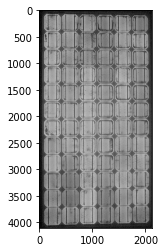

In [8]:
plt.imshow(cropped_image)

In [9]:
def remove_border(image, border_width):

    # Get the image dimensions
    height, width, _ = image.shape

    # Calculate the cropping box coordinates
    left = border_width
    top = border_width
    right = width - border_width
    bottom = height - border_width

    # Crop the image using NumPy slicing
    cropped_image = image[top:bottom, left:right]

    return cropped_image

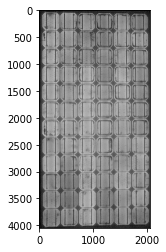

In [10]:
cropped_image = remove_border(cropped_image, 30)
plt.imshow(cropped_image)

In [11]:
image_name = file_name.split("\\")[-1]

In [12]:
cv2.imwrite("cleaned_images/" + image_name, cropped_image)

True

In [13]:
print(np.mean(cropped_image))

130.26473578825798


# Create dataset

In [18]:
import pandas as pd

image_folder = 'C:/Users/chuck/OneDrive/Desktop/IV_curve_prediction/images/'
csv_path = 'C:/Users/chuck/OneDrive/Desktop/Honors/IV_data.xlsx'
df = pd.read_excel(csv_path)

for index, row in df.iterrows():
    print(index)
    file_name = search_files_with_string(root_directory, str(row['ID']))
    id = file_name.split("\\")[-1]
    row['ID'] = id 

    img = cv2.imread(file_name)
    image = fix_barrel_distortion(img, toml_path)
    cropped_image = find_pv_module(image, model_module, show=False)
    cropped_image = remove_border(cropped_image, 30)
    cv2.imwrite("cleaned_images/" + id, cropped_image)
    
    
    
print(df)

0
1/1 [==============================] - 0s 138ms/step
1
1/1 [==============================] - 0s 128ms/step
2
1/1 [==============================] - 0s 129ms/step
3
1/1 [==============================] - 0s 129ms/step
4
1/1 [==============================] - 0s 131ms/step
5
1/1 [==============================] - 0s 134ms/step
6
1/1 [==============================] - 0s 131ms/step
7
1/1 [==============================] - 0s 128ms/step
8
1/1 [==============================] - 0s 130ms/step
9
1/1 [==============================] - 0s 128ms/step
10
1/1 [==============================] - 0s 128ms/step
11
1/1 [==============================] - 0s 133ms/step
12
1/1 [==============================] - 0s 131ms/step
13
1/1 [==============================] - 0s 130ms/step
14
1/1 [==============================] - 0s 135ms/step
15
1/1 [==============================] - 0s 128ms/step
16
1/1 [==============================] - 0s 128ms/step
17
1/1 [==============================] - 0s 129ms/step
18